In [49]:
import neat
import numpy as np
import graphviz.backend as backend
import graphviz


In [14]:
import os

# Add Graphviz path dynamically
os.environ["PATH"] += os.pathsep + r"C:\Program Files\Graphviz\bin"

# Verify if Python can now access dot
os.system("dot -V")


0

In [59]:
# XOR inputs and outputs
xor_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
xor_outputs = [0, 1, 1, 0]


In [60]:
def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        # Create a neural network from the genome
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        
        # Calculate fitness
        fitness = 4.0  # Start with max fitness
        for xi, xo in zip(xor_inputs, xor_outputs):
            output = net.activate(xi)  # Get the network's prediction
            fitness -= (output[0] - xo) ** 2  # Penalize error (squared error)
        
        # Assign fitness to the genome
        genome.fitness = fitness


In [61]:
config_path = "config-feedforward.txt"  # Replace with your file's path
config = neat.Config(neat.DefaultGenome, 
                     neat.DefaultReproduction,
                     neat.DefaultSpeciesSet, 
                     neat.DefaultStagnation, 
                     config_path)


In [74]:
population = neat.Population(config)
stats = neat.StatisticsReporter()
population.add_reporter(stats)
population.add_reporter(neat.StdOutReporter(True))


In [75]:
winner = population.run(eval_genomes, 200)  # Run for up to 100 generations
print('\nBest genome:\n{!s}'.format(winner))



 ****** Running generation 0 ****** 

Population's average fitness: 2.28448 stdev: 0.35281
Best fitness: 2.99367 - size: (1, 2) - species 1 - id 142
Average adjusted fitness: 0.569
Mean genetic distance 1.290, standard deviation 0.415
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   150      3.0    0.569     0
Total extinctions: 0
Generation time: 0.012 sec

 ****** Running generation 1 ****** 

Population's average fitness: 2.31229 stdev: 0.29869
Best fitness: 2.99992 - size: (1, 2) - species 1 - id 220
Average adjusted fitness: 0.457
Mean genetic distance 1.297, standard deviation 0.429
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1   150      3.0    0.457     0
Total extinctions: 0
Generation time: 0.013 sec (0.012 average)

 ****** Running generation 2 ****** 

Population's average fitness: 2.32613 stdev: 

In [76]:
# Create the best network
best_net = neat.nn.FeedForwardNetwork.create(winner, config)

# Test on XOR inputs
for xi, xo in zip(xor_inputs, xor_outputs):
    prediction = best_net.activate(xi)
    print(f"Input: {xi}, Predicted: {prediction[0]:.4f}, Expected: {xo}")


Input: (0, 0), Predicted: 0.0000, Expected: 0
Input: (0, 1), Predicted: 1.0000, Expected: 1
Input: (1, 0), Predicted: 1.0000, Expected: 1
Input: (1, 1), Predicted: 0.0000, Expected: 0


In [77]:
def draw_net(config, genome, filename='network'):
    dot = graphviz.Digraph(format='png')
    
    # Add input nodes
    for i in range(-config.genome_config.num_inputs, 0):
        dot.node(str(i), f"Input {abs(i)}", shape='circle')

    # Add output nodes
    for o in range(config.genome_config.num_outputs):
        dot.node(str(o), f"Output {o}", shape='circle')

    # Add hidden nodes
    for node in genome.nodes.keys():
        if node >= 0:  # Hidden nodes have non-negative indices
            dot.node(str(node), f"Node {node}", shape='circle')

    # Add edges with weights
    for (src, dest), conn in genome.connections.items():
        if conn.enabled:
            dot.edge(str(src), str(dest), label=f"{conn.weight:.2f}")

    # Render the network
    dot.render(filename, cleanup=True)
    print(f"Network visualization saved as {filename}.png")


In [78]:
draw_net(config, winner, filename='best_genome')


Network visualization saved as best_genome.png


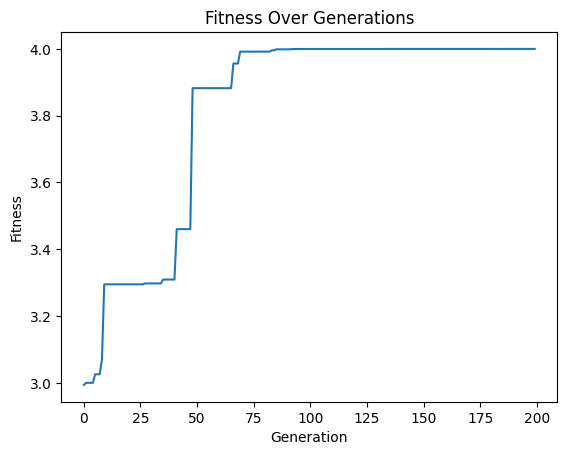

In [79]:
import matplotlib.pyplot as plt

generations = range(len(stats.most_fit_genomes))
fitness_scores = [genome.fitness for genome in stats.most_fit_genomes]

plt.plot(generations, fitness_scores)
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Fitness Over Generations")
plt.show()


In [48]:
generations

range(0, 76)